In [62]:
import math

# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change to data path on your local machine
data = pd.read_csv('D:\\Machine Learning\\linear_regression\\data\\SAT_GPA.csv')

# Show the description of the data
data.describe()

# Set to training data
X = data['SAT']
Y = data['GPA']

X_0 = np.array([X]).T
Y_0 = np.array([Y]).T
X_one = np.ones((X_0.shape[0] , 1))
X_3 = np.concatenate((X_one, X_0), axis= 1)
A = np.dot(X_3.T, X_3)
B = np.dot(X_3.T, Y_0)
THETA = np.dot(np.linalg.inv(A), B)


print(THETA)

# Remind that we need to put component x_0 = 1 to x

# plt.scatter(X, Y)
# plt.xlabel('SAT', fontsize=20)
# plt.ylabel('GPA', fontsize=20)
# plt.show()

[[0.2750403 ]
 [0.00165569]]


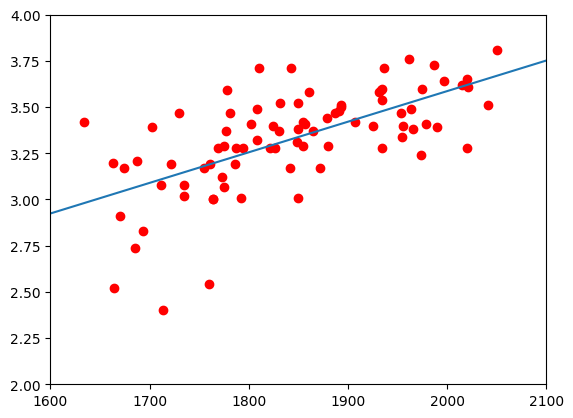

In [63]:
# draw the line of the model

THETA_0 = THETA[0][0]

THETA_1 = THETA[1][0]

x_0 = np.linspace(1600, 2100)
y_0 = THETA_0 + THETA_1 * x_0

plt.plot(X_0.T, Y_0.T, 'ro')
plt.plot(x_0, y_0)
plt.axis([1600, 2100, 2, 4])
plt.show()

# phương pháp K-NN

In [19]:
k = 8

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)

    return np.argsort(array_D)[:k]

data_len = len(X)

X_train = np.array(X[:64])
Y_train = np.array(Y[:64])


X_test = np.array(X[64:data_len])
Y_test = np.array(Y[64:data_len])



17


# K-NN

In [5]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] += Y_train[id]
    Y_pred[i] = Y_pred[i] / len(indexis)
    print(Y_pred[i],'|', Y_test[i])


3.3925000000000005 | 3.51
3.2749999999999995 | 3.52
3.2949999999999995 | 3.52
3.3975000000000004 | 3.54
3.295 | 3.58
3.3974999999999995 | 3.58
3.3975000000000004 | 3.59
3.2587500000000005 | 3.59
3.3899999999999997 | 3.6
3.3975000000000004 | 3.6
3.3874999999999993 | 3.61
3.3874999999999993 | 3.62
3.3662499999999995 | 3.64
3.3874999999999993 | 3.65
3.2950000000000004 | 3.71
3.3975000000000004 | 3.71
3.30875 | 3.71
3.3662500000000004 | 3.73
3.37625 | 3.76
3.3874999999999993 | 3.81


# Đánh giá mô hình

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print('Mean squared error: ', mse)

# Mean absolute error
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean absolute error: ', mae)

# R2 score
r2_score = r2_score(Y_test, Y_pred)

print('R2 score: ', r2_score)



Mean squared error:  0.08137789062500003
Mean absolute error:  0.2711875000000001
R2 score:  -10.951518670142466


# Ví dụ A2

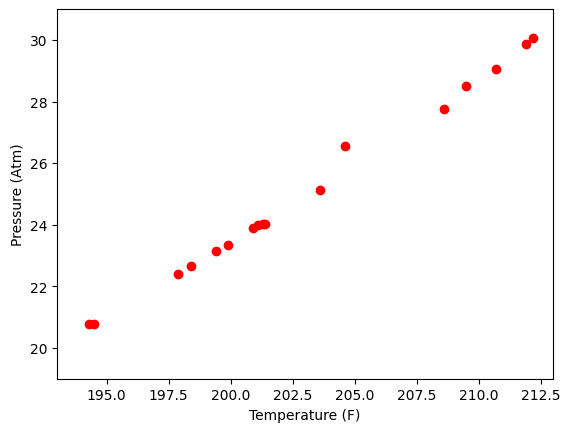

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3,
               203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,
               28.49,27.76,29.04,29.88,30.06]]).T



# Visualize data

plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()


# Thuật toán K-NN

In [10]:
k = 4

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)

    return np.argsort(array_D)[:k]

data_len = len(X)

X_train = np.array(X[:16])
Y_train = np.array(y[:16])
print(X_train)
X_test = np.array(X[16:data_len])
Y_test = np.array(y[16:data_len])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] += Y_train[id]
    Y_pred[i] = Y_pred[i] / len(indexis)
    print(Y_pred[i],'|', Y_test[i])


[[194.5]
 [194.3]
 [197.9]
 [198.4]
 [199.4]
 [199.9]
 [200.9]
 [201.1]
 [201.4]
 [201.3]
 [203.6]
 [204.6]
 [209.5]
 [208.6]
 [210.7]
 [211.9]]
[0.]
20.79 | [30.06]


C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\4157332563.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] += Y_train[id]


# Đánh giá mô hình

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print('Mean squared error: ', mse)

# Mean absolute error

mae = mean_absolute_error(Y_test, Y_pred)
print('Mean absolute error: ', mae)

# R2 score

r2_score = r2_score(Y_test, Y_pred)
print('R2 score: ', r2_score)

Mean squared error:  85.93289999999999
Mean absolute error:  9.27
R2 score:  nan


D:\Machine Learning\linear_regression\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


t# Ví dụ A3

In [12]:
import numpy as np
import math

# Read data from file
with open('D:\\Machine Learning\\linear_regression\\data\\fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []

lines.pop(0)

# Split data by comma and convert to float
for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]

    logMiles = math.log(splitted[3])

    y_data.append([fuel])
    x_data.append([splitted[1], dlic, splitted[2], logMiles])


# Convert to numpy array
x_data = np.array(x_data)
y_data = np.array(y_data)

# # Visualize data
# plt.scatter(x_data, y_data)
# plt.xlabel('Distance')
# plt.ylabel('Fuel')
# plt.show()


NameError: name 'plt' is not defined

In [7]:
# K-NN

k = 6



def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord= 2, axis= 0)


def find_nearest_index(array, value, k):
    array_D = distance(array, value)

    return np.argsort(array_D)[:k]


data_len = len(x_data)

X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])

X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] += Y_train[id]
    Y_pred[i] = Y_pred[i] / len(indexis)
    print(Y_pred[i], '|', Y_test[i])


620.3278448859403 | [711.73305769]
620.3278448859403 | [697.05277706]
620.3278448859403 | [638.23106095]
620.3278448859403 | [681.10013659]
620.3278448859403 | [591.49994589]
620.3278448859403 | [691.02271186]
620.3278448859403 | [681.03112144]
620.3278448859403 | [576.06974956]
620.3278448859403 | [562.4109333]
620.3278448859403 | [581.79371695]
620.3278448859403 | [842.79175243]


C:\Users\Admin\AppData\Local\Temp\ipykernel_17204\3729922199.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] += Y_train[id]


In [8]:
# Đánh giá mô hình

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print('Mean squared error: ', mse)

# Mean absolute error

mae = mean_absolute_error(Y_test, Y_pred)
print('Mean absolute error: ', mae)
# R2 score

r2_score = r2_score(Y_test, Y_pred)
print('R2 score: ', r2_score)

Mean squared error:  7641.5764831541455
Mean absolute error:  70.01861251545087
R2 score:  -0.25160320573654027


# B. PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH
## Ví dụ B.1

w =  [[-81.06372713]
 [  0.5228924 ]]


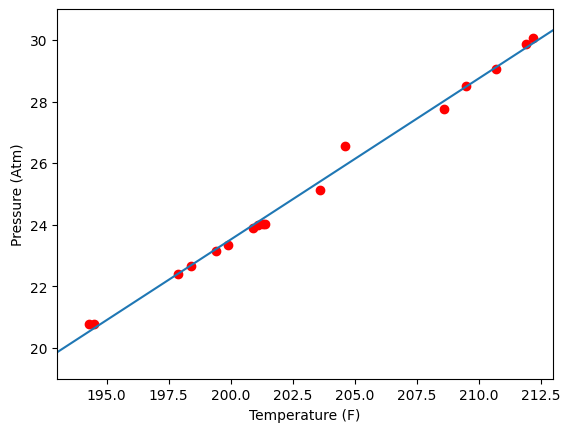

In [4]:
# Khoi tao du lieu

from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Building XBar
one = np.ones((X.shape[0], 1))
XBar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(XBar.T, XBar)
b = np.dot(XBar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line

w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()


## Ví dụ B.2


In [32]:
# Khoi tao du lieu

import math
import numpy as np
with open('D:\\Machine Learning\\linear_regression\\data\\fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

data_len = len(x_data)

x_data_train = x_data[:40]
y_data_train = y_data[:40]

x_data_test = x_data[40:data_len]
y_data_test = y_data[40:data_len]


[[1.00000000e+00 1.80000000e+01 1.03138007e+03 2.34710000e+04
  1.65271104e+01]
 [1.00000000e+00 8.00000000e+00 1.03164106e+03 3.00640000e+04
  1.37342862e+01]
 [1.00000000e+00 1.80000000e+01 9.08597153e+02 2.55780000e+04
  1.57535563e+01]
 [1.00000000e+00 2.17000000e+01 9.46570576e+02 2.22570000e+04
  1.65824360e+01]
 [1.00000000e+00 1.80000000e+01 8.44703336e+02 3.22750000e+04
  1.73647075e+01]
 [1.00000000e+00 2.20000000e+01 9.89606180e+02 3.29490000e+04
  1.63895977e+01]
 [1.00000000e+00 2.50000000e+01 9.99593430e+02 4.06400000e+04
  1.43519054e+01]
 [1.00000000e+00 2.30000000e+01 9.24344838e+02 3.12550000e+04
  1.25053154e+01]
 [1.00000000e+00 2.00000000e+01 7.00195273e+02 3.73830000e+04
  1.05830828e+01]
 [1.00000000e+00 1.36000000e+01 1.00012416e+03 2.81450000e+04
  1.68398312e+01]
 [1.00000000e+00 7.50000000e+00 9.33302595e+02 2.79400000e+04
  1.68179580e+01]
 [1.00000000e+00 1.60000000e+01 8.29997134e+02 2.82210000e+04
  1.20627208e+01]
 [1.00000000e+00 2.50000000e+01 9.251934

In [14]:
# Dung thuat toán HoldHouse để triển khai QR
# Use numpy

def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(n, N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [19]:
# ham hoi quy tuyen tinh

def linear_regression(x_data, y_data):
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # Pseudo inverse of R
    A = np.dot(R_pinv, Q.T) # A = R^(-1)Q^T

    return np.dot(A, y_data)

w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()

line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))

for o in res:
    print("{: >20}: {: >10}".format(*o))



           Intercept: 207.32210060259192
                 Tax: -4.553438140493977
                Dlic: 0.45831308505905033
              Income: -0.006107270970864586
            LogMiles: 16.315092361051857


In [33]:
# use library sklearn
from sklearn import datasets, linear_model

# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(x_data_train, y_data_train)

# Compare two results
print('Solution found by scikit-learn  : ', regr.coef_)

Solution found by scikit-learn  :  [[ 1.35142023e+02 -1.90301193e+00  4.18592399e-01 -6.22943009e-03
   1.95938559e+01]]


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [41]:
# Danh gia mo hinh

# Using numpy

w_train_numpy = linear_regression(x_data_train, y_data_train)
w_test_numpy = linear_regression(x_data_test, y_data_test)
y_train_pred_numpy = np.dot(np.concatenate((np.ones((x_data_train.shape[0], 1)), x_data_train), axis=1), w_train_numpy)
y_test_pred_numpy = np.dot(np.concatenate((np.ones((x_data_test.shape[0], 1)), x_data_test), axis=1), w_test_numpy)

mse_train_numpy, mae_train_numpy, r2_train_numpy = evaluate_model(y_data_train, y_train_pred_numpy)
mse_test_numpy, mae_test_numpy, r2_test_numpy = evaluate_model(y_data_test, y_test_pred_numpy)

print('Numpy')
# Data Train
print('Mean squared error (train): ', mse_train_numpy)
print('Mean absolute error (train): ', mae_train_numpy)
print('R2 score (train): ', r2_train_numpy)
# Data Test
print('Mean squared error (test): ', mse_test_numpy)
print('Mean absolute error (test): ', mae_test_numpy)
print('R2 score (test): ', r2_test_numpy)



Numpy
Mean squared error (train):  3354.3511241803126
Mean absolute error (train):  44.09505389719993
R2 score (train):  0.5502774879330957
Mean squared error (test):  1326.894780569824
Mean absolute error (test):  29.75553539099477
R2 score (test):  0.7826697456084633


In [42]:
# Using sklearn

regr_train = linear_model.LinearRegression(fit_intercept=False)
regr_train.fit(x_data_train, y_data_train)

regr_test = linear_model.LinearRegression(fit_intercept=False)
regr_test.fit(x_data_test, y_data_test)

y_train_pred_sklearn = regr_train.predict(x_data_train)
y_test_pred_sklearn = regr_test.predict(x_data_test)

mse_train_sklearn, mae_train_sklearn, r2_train_sklearn = evaluate_model(y_data_train, y_train_pred_sklearn)
mse_test_sklearn, mae_test_sklearn, r2_test_sklearn = evaluate_model(y_data_test, y_test_pred_sklearn)

print('Sklearn')
# Data Train
print('Mean squared error (train): ', mse_train_sklearn)
print('Mean absolute error (train): ', mae_train_sklearn)
print('R2 score (train): ', r2_train_sklearn)
# Data Test
print('Mean squared error (test): ', mse_test_sklearn)
print('Mean absolute error (test): ', mae_test_sklearn)
print('R2 score (test): ', r2_test_sklearn)


Sklearn
Mean squared error (train):  3344.7857641120872
Mean absolute error (train):  44.20973618833856
R2 score (train):  0.5515599290370389
Mean squared error (test):  1421.245767852726
Mean absolute error (test):  29.509187005077603
R2 score (test):  0.7672161283597166


# Bai tap tu thuc hanh
## Vi du B.3

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# load the data

data = pd.read_csv('D:\\Machine Learning\\linear_regression\\data\\SAT_GPA.csv')
x = data['SAT'].values.reshape(-1, 1)
y = data['GPA'].values.reshape(-1, 1)

# reshape the data
pearson_corr = np.corrcoef(data['SAT'], data['GPA'])[0, 1]
print(f'Pearson Correlation Coefficient: {pearson_corr}')

# split the data into training and testing data
x_train = np.array(x[:64])
y_train = np.array(y[:64])

x_test = np.array(x[64:])
y_test = np.array(y[64:])

print(y_train)

Pearson Correlation Coefficient: 0.6371843648401915
[[2.4 ]
 [2.52]
 [2.54]
 [2.74]
 [2.83]
 [2.91]
 [3.  ]
 [3.  ]
 [3.01]
 [3.01]
 [3.02]
 [3.07]
 [3.08]
 [3.08]
 [3.12]
 [3.17]
 [3.17]
 [3.17]
 [3.17]
 [3.19]
 [3.19]
 [3.19]
 [3.2 ]
 [3.21]
 [3.24]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.28]
 [3.29]
 [3.29]
 [3.29]
 [3.31]
 [3.32]
 [3.34]
 [3.37]
 [3.37]
 [3.37]
 [3.38]
 [3.38]
 [3.39]
 [3.39]
 [3.4 ]
 [3.4 ]
 [3.4 ]
 [3.41]
 [3.41]
 [3.41]
 [3.42]
 [3.42]
 [3.42]
 [3.44]
 [3.47]
 [3.47]
 [3.47]
 [3.47]
 [3.48]
 [3.49]
 [3.49]
 [3.5 ]
 [3.51]]


In [58]:
# Linear Regression

model = LinearRegression()
model.fit(x_train, y_train)

t_0 = model.intercept_
t_1 = model.coef_[0]

print(f'Intercept (t_0): {t_0}')
print(f'Coefficient (t_1): {t_1}')

Intercept (t_0): [0.83820976]
Coefficient (t_1): [0.00131839]


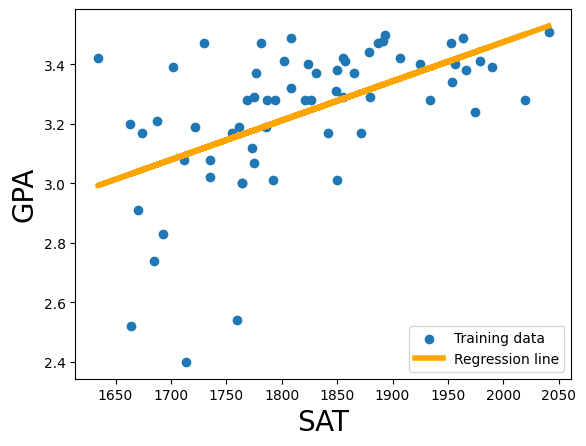

In [59]:
# Plot the regression line with training data
plt.scatter(x_train, y_train, label='Training data')
yhat_train = t_1 * x_train + t_0
plt.plot(x_train, yhat_train, lw=4, c='orange', label='Regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.legend()
plt.show()

In [60]:
# Evaluate the model with validation data
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 0.07263824293181359
MAE: 0.24880371695218736
R-squared: -9.667975169894788


In [61]:
# K-NN
knn_model = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train, y_train)
yhat_knn = knn_model.predict(x_test)
mse_knn = mean_squared_error(y_test, yhat_knn)
mae_knn = mean_absolute_error(y_test, yhat_knn)
r2_knn = r2_score(y_test, yhat_knn)
print(f'K-NN MSE: {mse_knn}')
print(f'K-NN MAE: {mae_knn}')
print(f'K-NN R-squared: {r2_knn}')

K-NN MSE: 0.08137789062499998
K-NN MAE: 0.2711875
K-NN R-squared: -10.951518670142459


## Vi du B.4

In [70]:
import numpy as np
import pandas as pd


# load the data

data = pd.read_csv('D:\\Machine Learning\\linear_regression\\data\\vidu4_lin_reg.txt', delim_whitespace=True)

X = data[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']].values
y = data['BEDAYNTM'].values
X = np.column_stack((np.ones(len(X)), X))

B = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("B0 = {:.4f}, B1 = {:.4f}, B2 = {:.4f}, B3 = {:.4f}, B4 = {:.4f}, B5 = {:.4f}".format(B[0], B[1], B[2], B[3], B[4], B[5]))

# split the data into training and testing data

data_train = data.iloc[:80]
data_test = data.iloc[80:]

X_train = data_train[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']].values
Y_train = data_train['BEDAYNTM'].values

X_train = np.column_stack((np.ones(len(X_train)), X_train))

B_train = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ Y_train)


X_test = data_test[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']].values
Y_test = data_test['BEDAYNTM'].values

X_test = np.column_stack((np.ones(len(X_test)), X_test))

Y_pred = X_test @ B_train
print("Predicted values: ", Y_pred)


B0 = -0.1080, B1 = 0.0099, B2 = 0.0385, B3 = 0.0077, B4 = 0.0022, B5 = -0.0002
Predicted values:  [0.91012272 0.78452963 1.22339369 0.96085817 0.96836123 1.05009561
 1.19694736 1.0521678  0.9936207  0.68503543 0.78429172 0.77109845
 1.19748204 1.06844174 0.99721921 1.03380704 1.14558205 1.19228584
 1.29236178 1.26252546]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16212\4259830718.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('D:\\Machine Learning\\linear_regression\\data\\vidu4_lin_reg.txt', delim_whitespace=True)


In [71]:
# residuals
residuals = Y_test - Y_pred
print("Residuals: ", residuals)

# mean squared error
mean = np.mean(residuals)

# mean absolute error
var = np.var(residuals, ddof=1)

print("\nTrên tập testing (20 mẫu):")
print("Sai số trung bình (E(e)) = {:.4f}".format(mean))
print("Phương sai của sai số (Var(e)) = {:.4f}".format(var))


Residuals:  [-0.11012272 -0.08452963 -0.22339369 -0.16085817 -0.07836123 -0.45009561
  0.30305264 -0.3521678   0.1063793   0.12496457 -0.08429172 -0.06109845
  1.50251796  0.06155826  0.70278079 -0.13380704  0.01441795 -0.19228584
 -0.32236178  1.03747454]

Trên tập testing (20 mẫu):
Sai số trung bình (E(e)) = 0.0800
Phương sai của sai số (Var(e)) = 0.2326


## Vi du B.5

In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# load the data

data = pd.read_csv('D:\\Machine Learning\\linear_regression\\data\\real_estate.csv')

data['X1 transaction date'] = data['X1 transaction date'].astype(int)

# split the data into training and testing data

data_train = data.iloc[:350]
data_test = data.iloc[350:, :]

x_train = data_train[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values
y_train = data_train['Y house price of unit area'].values

x_test = data_test[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values
y_test = data_test['Y house price of unit area'].values


In [79]:
# Linear Regression
model = LinearRegression()

model.fit(x_train, y_train)

# predict the price of the house
y_pred = model.predict(x_test)

# Calculate the sum of squared errors (SSE)
sse = np.sum((y_test - y_pred) ** 2)
print(f'Sum of Squared Errors (SSE): {sse}')

# Calculate the mean squared error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE): {mae}')

Sum of Squared Errors (SSE): 4083.6448394273953
Mean Squared Error (MSE): 63.80695061605305
Mean Absolute Error (MAE): 6.0326047078456835


In [81]:
# K-NN

knn_model = KNeighborsRegressor(n_neighbors= 18)
knn_model.fit(x_train, y_train)

# predict the price of the house
y_pred_knn = knn_model.predict(x_test)

# Calculate the sum of squared errors (SSE)
sse_knn = np.sum((y_test - y_pred_knn) ** 2)
print(f'K-NN Sum of Squared Errors (SSE): {sse_knn}')

# Calculate the mean squared error (MSE)
mse_knn = np.mean((y_test - y_pred_knn) ** 2)
print(f'K-NN Mean Squared Error (MSE): {mse_knn}')

# Calculate the mean absolute error (MAE)
mae_knn = np.mean(np.abs(y_test - y_pred_knn))
print(f'K-NN Mean Absolute Error (MAE): {mae_knn}')

K-NN Sum of Squared Errors (SSE): 2822.536574074074
K-NN Mean Squared Error (MSE): 44.102133969907406
K-NN Mean Absolute Error (MAE): 4.803559027777777
